# Catmull-Rom Splines Python Notebook

This is a Python notebook intended to help users mess around and understand 
Catmull-Rom Splines in Python with good ol' Numpy.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

Below is the Python implementation of the Catmull-Rom Spline, which takes in 
the 4 points as well as tau, and returns the 4 coefficients.

In [4]:
def catmull_rom_spline(tau, points):
    points = np.array(points)
    print(points)
    matrix = np.array([
        [0, 1, 0, 0],
        [-tau, 0, tau, 0],
        [2*tau, tau-3, 3-(2*tau), -tau],
        [-tau, 2-tau, tau-2, tau],
    ])
    coeffs = np.matmul(matrix, points)
    return coeffs

We can mess around with different values of tau and different point(s) arrays and see the resulting coefficients. The below example is:
The first spline goes from 0.01 to 1.8, and the second one goes from 1.8 down to 0. We can graph the results later, too!

In [5]:

# generate points before
# set tau again if need be
tau = 0.3
max_vel = 1.8
x1 = 0.01
x2 = 0
first_points = [0, x1, max_vel, max_vel]
second_points = [max_vel, max_vel, 0, 0]

# points = [-0.3, 0.1, 0.5, 0.9]

first_spline = catmull_rom_spline(tau, first_points)
second_spline = catmull_rom_spline(tau, second_points)


[ 0.    0.01  1.8   1.8 ]
[ 1.8  1.8  0.   0. ]


Below is a function that calculates the result from an $n$ order polynomial, where $n = $ `len(coeffs)`. `x` is simply a numerical input in this case.

In [6]:
# get some points
def calc_poly(coeffs, x):
    y = 0
    power = 0
    for c in coeffs:
        y+=(c*(x**power))
        power+=1
    return y


In [7]:
# getting two arrays from the two splines that we can graph
arr1 = np.array([calc_poly(first_spline, x) for x in np.linspace(0,1)])
arr2 = np.array([calc_poly(second_spline, x) for x in np.linspace(0,1)])

In [8]:
full_arr = np.concatenate((arr1, arr2))

In [9]:
# let's check out the full result!
full_arr

array([  1.00000000e-02,   2.25622317e-02,   3.81230100e-02,
         5.65546838e-02,   7.77296025e-02,   1.01520115e-01,
         1.27798570e-01,   1.56437318e-01,   1.87308706e-01,
         2.20285085e-01,   2.55238804e-01,   2.92042210e-01,
         3.30567655e-01,   3.70687486e-01,   4.12274052e-01,
         4.55199704e-01,   4.99336790e-01,   5.44557659e-01,
         5.90734660e-01,   6.37740142e-01,   6.85446455e-01,
         7.33725948e-01,   7.82450969e-01,   8.31493867e-01,
         8.80726993e-01,   9.30022695e-01,   9.79253321e-01,
         1.02829122e+00,   1.07700875e+00,   1.12527824e+00,
         1.17297206e+00,   1.21996255e+00,   1.26612206e+00,
         1.31132294e+00,   1.35543753e+00,   1.39833819e+00,
         1.43989727e+00,   1.47998711e+00,   1.51848007e+00,
         1.55524849e+00,   1.59016473e+00,   1.62310112e+00,
         1.65393003e+00,   1.68252380e+00,   1.70875477e+00,
         1.73249530e+00,   1.75361774e+00,   1.77199444e+00,
         1.78749774e+00,

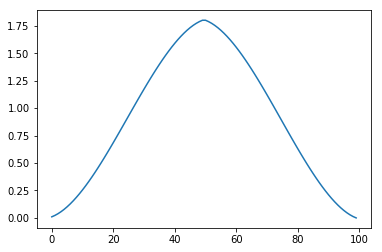

In [10]:
# plot the two splines
plt.plot(full_arr)

# separate function 
def catmull_norm(max_val):
    arr = np.linspace(0, max_val)
    arr = arr / max_val
    print(arr)

